# Regression models

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("D:/VIT 2nd Sem/Project Work/Final work/data/student_performance_dataset_with_engineered_features.csv")
df.head()

,age,gender,recent_past_grades,attendance,attention_lectures,stress_level,sleep_hours,sleep_quality,motivation_score,social_support,...,room_sharing,sgpa,stress_sleep_ratio,motivation_stress_diff,screen_sleep_balance,rest_quality_score,mental_health_index,study_support_score,time_drain_score,room_disturbance_score
0,18,Other,6.7,75-85%,2,2,7.7,1,5,1,...,0,4.32,0.259740,3,1.103895,7.7,4,5,1.6,0
1,29,Other,9.4,Below 55%,4,2,5.8,5,3,1,...,1,5.87,0.344827,1,1.844824,29.0,2,10,3.0,3
2,24,Male,7.2,65-75%,5,3,8.1,1,4,5,...,0,4.90,0.370370,1,0.308642,8.1,6,7,7.2,0
3,21,Female,5.5,75-85%,1,4,4.7,4,3,2,...,1,4.00,0.851062,-1,1.212763,18.8,1,6,0.5,5
4,28,Other,8.5,75-85%,3,1,4.4,1,3,4,...,1,5.47,0.227272,2,0.999998,4.4,6,12,1.2,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66419 entries, 0 to 66418
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       66419 non-null  int64  
 1   gender                    66419 non-null  object 
 2   recent_past_grades        66419 non-null  float64
 3   attendance                66419 non-null  object 
 4   attention_lectures        66419 non-null  int64  
 5   stress_level              66419 non-null  int64  
 6   sleep_hours               66419 non-null  float64
 7   sleep_quality             66419 non-null  int64  
 8   motivation_score          66419 non-null  int64  
 9   social_support            66419 non-null  int64  
 10  screen_time               66419 non-null  float64
 11  family_income             66419 non-null  int64  
 12  parental_involvement      66419 non-null  int64  
 13  household_size            66419 non-null  int64  
 14  study_

In [5]:
X = df.drop(columns=["sgpa"])
y = df["sgpa"]

categorical = ["gender", "attendance"]
numerical = [col for col in X.columns if col not in categorical]

In [6]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(drop="first"), categorical)
])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Bayesian Ridge": BayesianRidge(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}

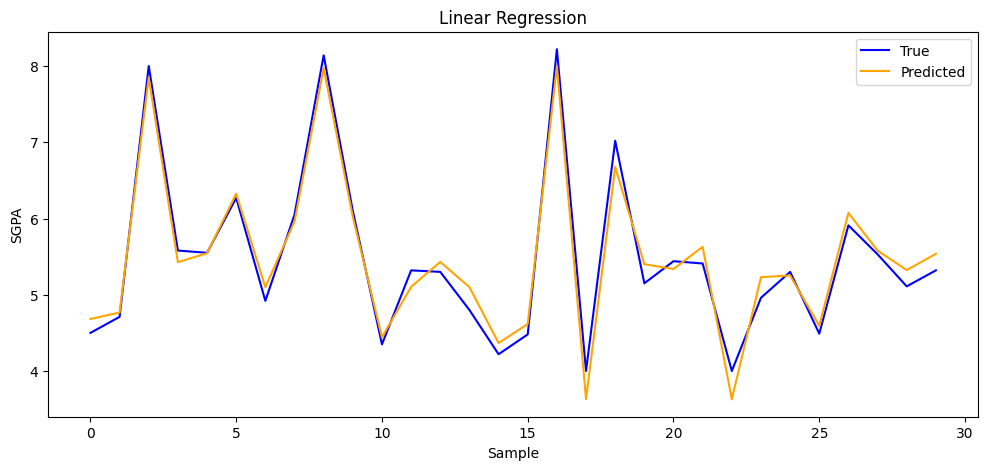

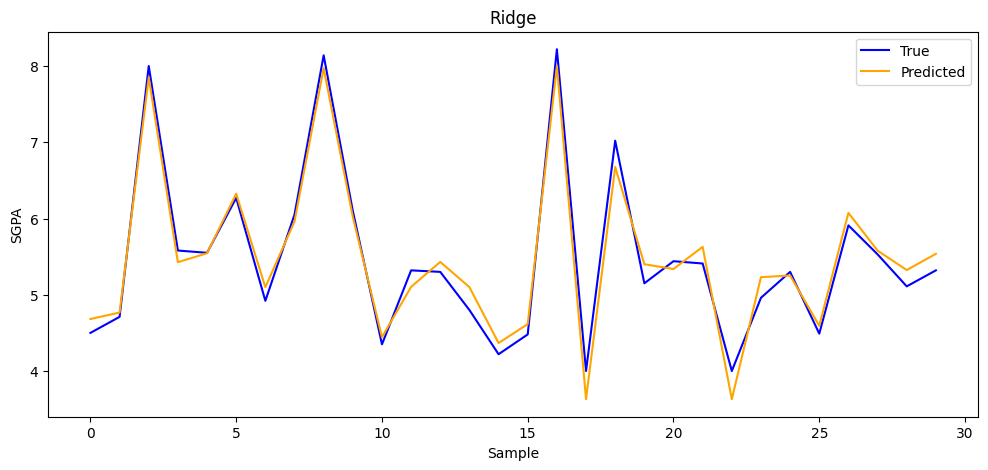

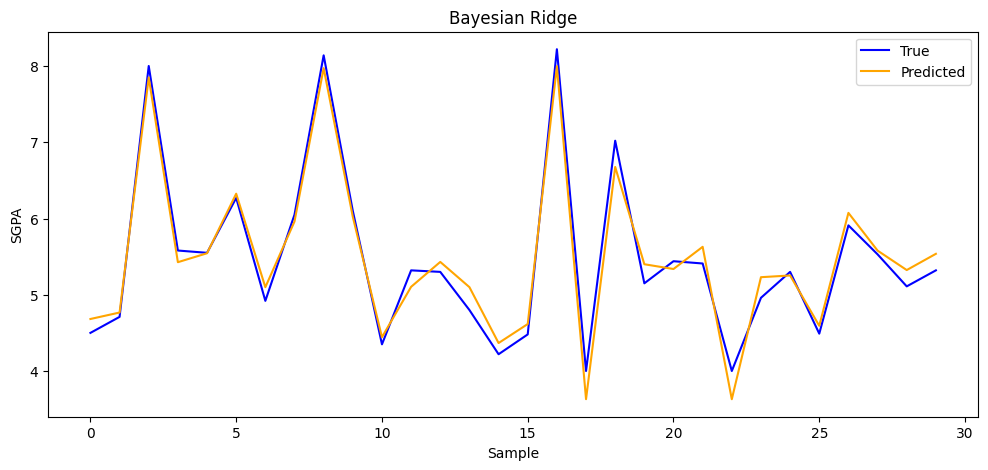

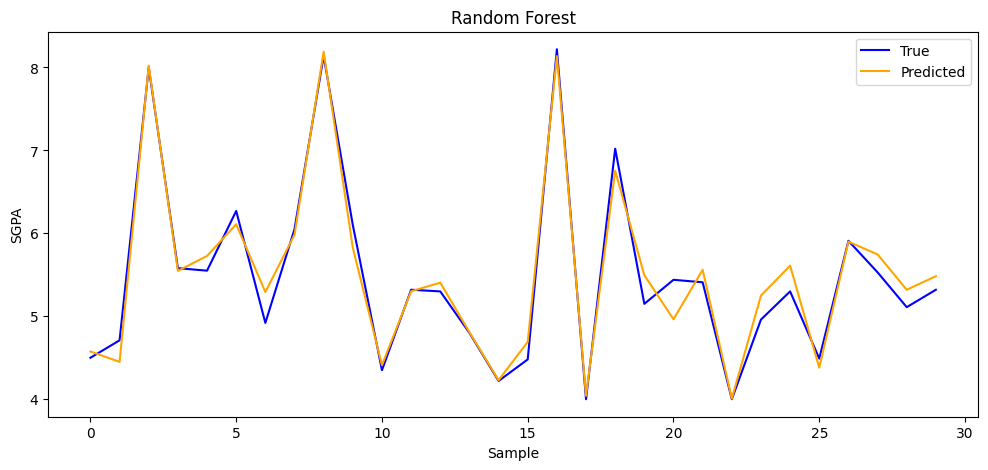

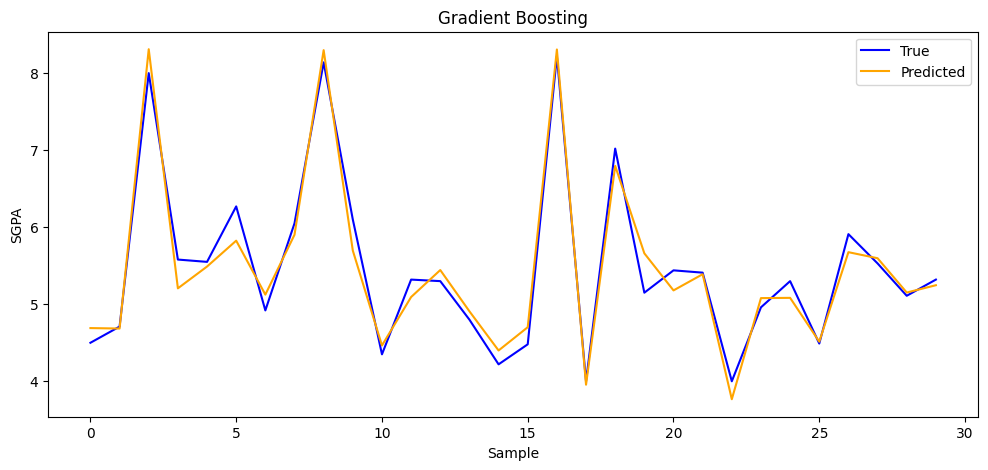

In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values[:30], label="True", color='blue')
    plt.plot(y_pred[:30], label="Predicted", color='orange')
    
    plt.title(f"{name}")
    plt.ylabel("SGPA")
    plt.xlabel("Sample")
    plt.legend()
    
    plt.show()

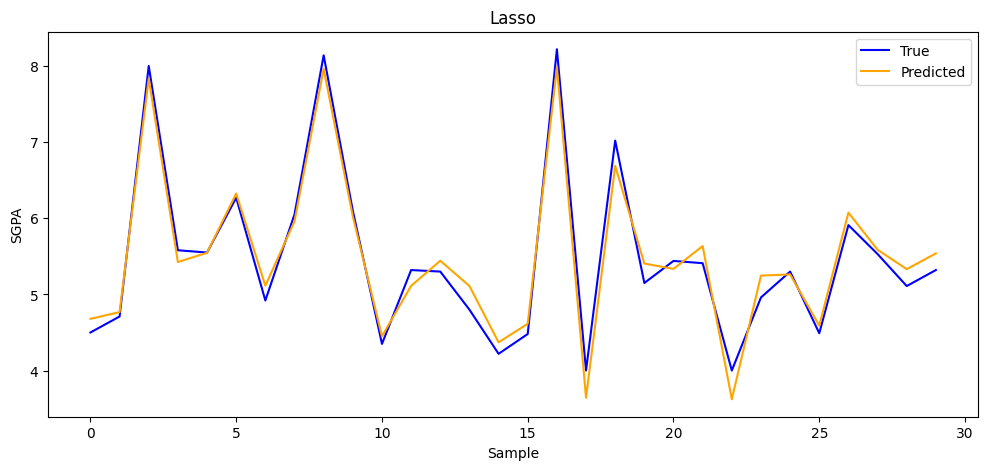

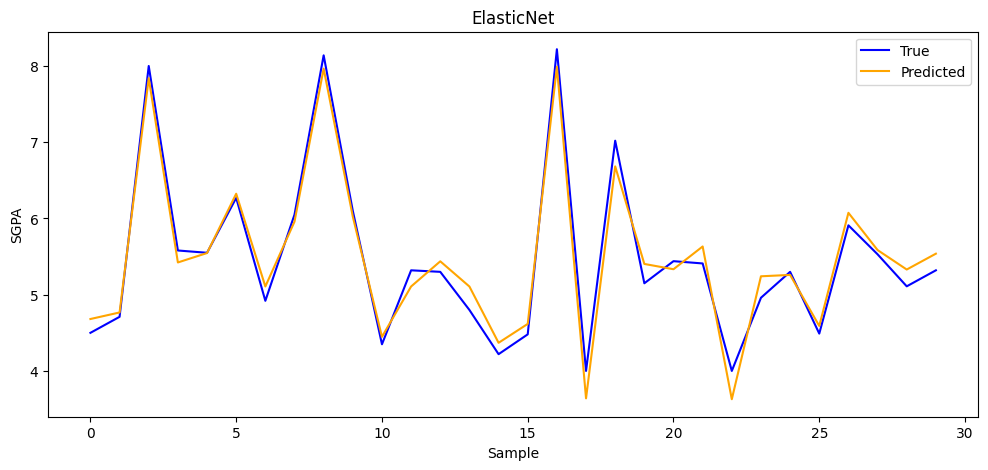

In [10]:
def tune_model(model_class, model_name):
    best_r2 = -float('inf')
    best_model = None
    best_alpha = None
    best_pred = None
    alphas = [0.001, 0.01, 0.1, 1, 10]

    for alpha in alphas:
        model = model_class(alpha=alpha, max_iter=10000)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_alpha = alpha
            best_pred = pred

    results[model_name] = {
        "MAE": mean_absolute_error(y_test, best_pred),
        "MSE": mean_squared_error(y_test, best_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, best_pred)),
        "R2": r2_score(y_test, best_pred)
    }

    return best_pred

lasso_pred = tune_model(Lasso, "Lasso")
enet_pred = tune_model(ElasticNet, "ElasticNet")

lassoEnet = {
    "Lasso": lasso_pred,
    "ElasticNet": enet_pred
}


for name, model in lassoEnet.items():
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values[:30], label="True", color='blue')
    plt.plot(model[:30], label="Predicted", color='orange')
    
    plt.title(f"{name}")
    plt.xlabel("Sample")
    plt.ylabel("SGPA")
    plt.legend()
    
    plt.show()

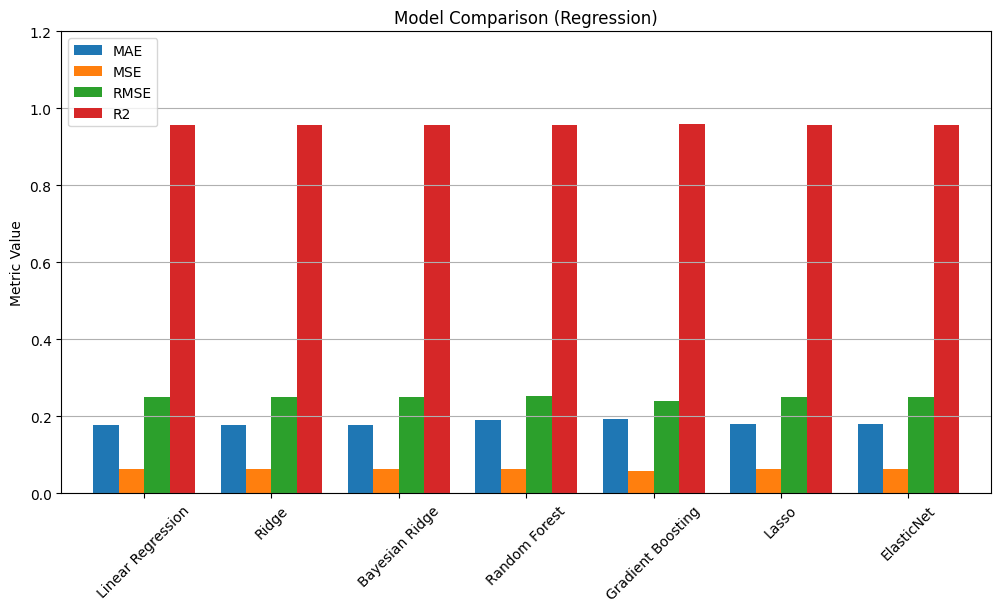

In [14]:
metrics_df = pd.DataFrame(results).T.round(4)
metrics_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("Model Comparison (Regression)")
plt.ylabel("Metric Value")
plt.ylim(0, 1.2)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [16]:
def highlight_best(s):
    if s.name == "R2":
        is_best = s == s.max()
    else:
        is_best = s == s.min()
    return ['background-color: blue' if v else '' for v in is_best]

styled_df = metrics_df.style.apply(highlight_best)
display(styled_df)

,MAE,MSE,RMSE,R2
Linear Regression,0.179100,0.062300,0.249500,0.956900
Ridge,0.179100,0.062300,0.249500,0.956900
Bayesian Ridge,0.179100,0.062300,0.249500,0.956900
Random Forest,0.191800,0.063500,0.252000,0.956000
Gradient Boosting,0.193700,0.057900,0.240600,0.959900
Lasso,0.179800,0.062400,0.249700,0.956800
ElasticNet,0.179600,0.062300,0.249600,0.956900
